# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from scipy.stats import pearsonr
from statsmodels.stats.weightstats import ztest  

Ось так можемо переглянути, які є листки в Excel файлі:

In [3]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [5]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [6]:
df = pd.read_excel(path_to_file)

Подивимося спочатку на данні - як вони виглядають та які типи даних ми маємо у нашому наборі. 

In [7]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

Під час виклику різних колонок виявилось, що це неможливо зробити для колонок Description та Brand, хоча вони є у файлі та у переліку вище. Тому виникає думка про те, що треба перевірити список колонок у наьорі даних.

In [9]:
df.columns

Index(['Receipt Number', 'Date', 'Year', 'Month', 'Time', 'Mobile Number',
       'Membership ID', 'Loyalty Card Points', 'Age', 'Gender', 'City',
       'Country', 'Category', 'Sub_Category', 'Items', 'Brand ',
       'Description ', 'Price', 'QTY', 'DISC', 'Amount', 'Net Bill Amount',
       'GST', 'Gross Bill Amount', 'Payment Mode', 'Bank Name',
       '% Profit Margin', '% Operating Cost', '% Product Cost',
       'Profit Margin', 'Operating Cost', 'Product Cost'],
      dtype='object')

Бачимо, що помилку викликає пробіл після назви, який для зручності можна видалити. 

In [10]:
df.rename(columns={'Description ': 'Description', 'Brand ': 'Brand'}, inplace=True)

Далі цікаво подивитися на пропущенні значення: чи є вони і де саме. На щастя, в цьому датафреймі їх немає.

In [11]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

Перетворимо певні колонки даних на Categorical - де це можливо.

In [252]:
columns = ['Gender', 'Country', 'Payment Mode', 'Gender']

for col in columns:
    df[col] = pd.Categorical(df[col])


In [253]:
#df['Brand'].value_counts()

1. Поглянемо на зміни середнього чистої суми рахунку, що отримав клієнт, у залежності від віку клієнтів у різних країнах.

In [254]:
age_pivot = df.pivot_table(index='Age', columns='Country', values='Net Bill Amount')

In [255]:
age_pivot

Country,Indonesia,Malaysia,Philippines,Singapore
Age,,,,
15,65.868778,66.510344,55.829731,68.315962
16,51.063744,62.170190,60.242361,81.401737
17,65.756792,69.573994,65.801642,64.223891
18,75.668693,70.347844,70.137668,66.110490
19,70.049925,74.400582,61.967251,60.933891
...,...,...,...,...
71,89.461626,70.526374,NaN,55.009421
72,59.712405,53.274914,NaN,42.716467
73,59.285505,85.212689,NaN,88.315351


Отже, ми маємо чотири країни, де відбувалися замовлення та покупки, та клієнти віком від 15 до 75 років.
Деякі елементи таблиці мають значення NaN. Подивимося, з чим це може бути пов'язано.

In [256]:
df[df.Age == 74][df.Country == 'Malaysia']['Net Bill Amount']

Series([], Name: Net Bill Amount, dtype: float64)

Для одного з записів у age_pivot відсутня інформація в оснвному наборі даних. Тобто пропущенні значення виникають через відсутність клієнтів зазначенного віку. Перевіримо, скільки ми маємо всього пропущенних значень у зведенній таблиці.

In [257]:
age_pivot.isna().sum()

Country
Indonesia      5
Malaysia       8
Philippines    6
Singapore      0
dtype: int64

Записів відносно небагато, тому пропоную замінити їх середнім значенням по кожній відподній країні.

In [258]:
country_list = age_pivot.columns.tolist()

for country in country_list:
    age_pivot[country].fillna(age_pivot[country].mean(), inplace=True)
    #print(age_pivot[country].mean())

Перевіримо наявність пропущенних даних ще раз, щоб запевнитись, що вони успішно замінені.

In [259]:
age_pivot.isna().sum()

Country
Indonesia      0
Malaysia       0
Philippines    0
Singapore      0
dtype: int64

А тепер цікаво подивитись, яким є розподіл Net Bill Amount для кожної країни у залежності від віку.

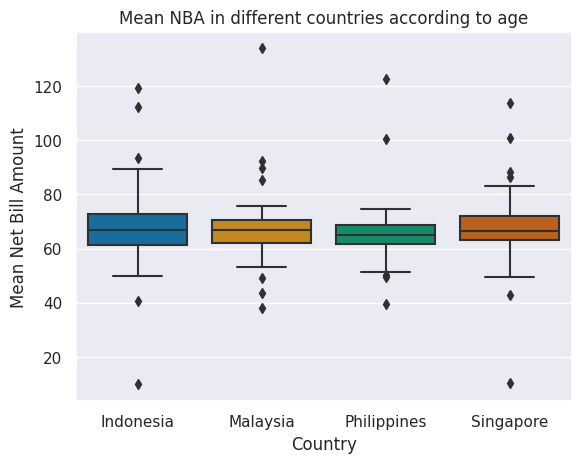

In [260]:
sns.set(style='darkgrid')
sns.boxplot(data=age_pivot, palette='colorblind')

plt.ylabel('Mean Net Bill Amount')
plt.title('Mean NBA in different countries according to age');

Бачимо, що у всіх випадках ми маємо виброси у даних. Всі графіки значною мірою перетинаються та мають схоже значення медіани (близько 65-67). Це означає, що для всіх країн та обранного вікового діапазону (15-75 років) найбільш популярне середнє значення чистої суми рахунку було приблизно однаковим. Найбільший розкид даних демонструють Індонезія та Сінгапур (щільність групування даних менше, ніж у двох інших країн), окрім того боксплот для Індонезії є значно скошеним вправо. Розкид може вказувати на те, що різні вікові категорії мали несхожі середні Net Bill Amount, тобто не мало місця скупчення даних коло одного значення (наприклад, медіани). Скошення вказує на те, що в Індозеї є тенденція до більших середніх чеків, в той час як у Малазії та Філліпін - навпаки (з огляду на нижнє та верхнє екстремальні значення).
Інші графіки також демонструють скошення, але меншою мірою. 

Тепер подивимося для різних країн середній профіт у залежності від категорії продукту. З наступної зведенної таблиці ми можемо побачити, у яких країних певна категорія має найвищий середній профіт, а у яких - найнижчій. Якщо припустити, що середній профіт за категорією може відображати попит на товари категорії (наприклад, якщо на товари цієї категорії у певних країнах/районах ажіотаж, то це теоретично може призвести до підвищення ціни - люди будуть купляти, не дивлячись на підняття ціни), то можна робити пропущення про роботу з цільовою аудиторію або про ефективність рекламних кампаній, цінової політики, тощо. Цю таблицю цікаво аналізувати у поєднанні з іншими графіками, як наприклад з завдання 3.

In [290]:
categ_pivot = df.pivot_table(index='Country', columns='Category', values='Profit Margin', aggfunc='mean')

In [291]:
categ_pivot.style.background_gradient(axis=0)

Category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
Country,,,,,,,,,,,,,,,,
Indonesia,0.919685,1.512095,1.104250,0.945652,0.811724,1.449241,1.066450,1.629224,1.032993,0.649662,1.947370,2.108515,0.957872,1.325367,0.516283,2.074635
Malaysia,0.914548,1.536384,1.093283,0.951400,0.793948,1.488474,0.971446,1.787664,1.014506,0.621035,1.892377,2.009482,0.851430,1.283920,0.542632,2.219560
Philippines,0.911668,1.489601,1.069546,0.983540,0.762968,1.370833,0.974026,1.656379,0.898387,0.621176,1.931221,2.033098,0.866176,1.269399,0.512535,2.124855
Singapore,0.927536,1.577811,1.097755,1.010687,0.792684,1.477921,1.011448,1.880741,1.026962,0.635929,1.970494,2.096545,0.925132,1.286005,0.515416,2.112585


2. Тепер подвимося на значення середнього Net Bill Amount у залежності від статті. Перше, що зробимо - поглядемо на розподіл жінок та чоловіків у всьому наборі даних.

In [261]:
df.Gender.value_counts(normalize=True)

Female    0.829028
Male      0.170972
Name: Gender, dtype: float64

In [262]:
df.groupby('Gender')['Net Bill Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,41822.0,67.135719,45.818379,0.9785,35.4923,59.0439,91.1040,527.668
Male,8625.0,64.559228,42.447578,1.0379,34.7163,56.7552,87.7338,356.592


Жінок у датафреймі значно більше, ніж чоловіків, але середні та стандартне відхилення (як і значення персентилей) відмінні лише трохи. Лише максимальне значення відрізняється помітно для двох статей.

Тепер звернумо увагу, чи зберігається тенеденція переваги жінок над чоловіками, якщо подивитися на окремі країни з нашого набору даних.

In [263]:
df.groupby(['Country', 'Gender']).Gender.count()

Country      Gender
Indonesia    Female     7378
             Male       1730
Malaysia     Female     8176
             Male       2587
Philippines  Female     9537
             Male       2843
Singapore    Female    16731
             Male       1465
Name: Gender, dtype: int64

Співвідношення приблизно однакове для перших трьох країн, а от у Сінгапурі кількість жінок - найбільша.

In [300]:
profit_country_gender = df.pivot_table(index='Gender', columns='Country', values='Net Bill Amount', aggfunc='mean')

In [301]:
profit_country_gender.style.background_gradient(axis=0)

Country,Indonesia,Malaysia,Philippines,Singapore
Gender,,,,
Female,67.648478,68.206773,65.581308,67.272252
Male,67.794407,65.752390,61.336401,64.886145


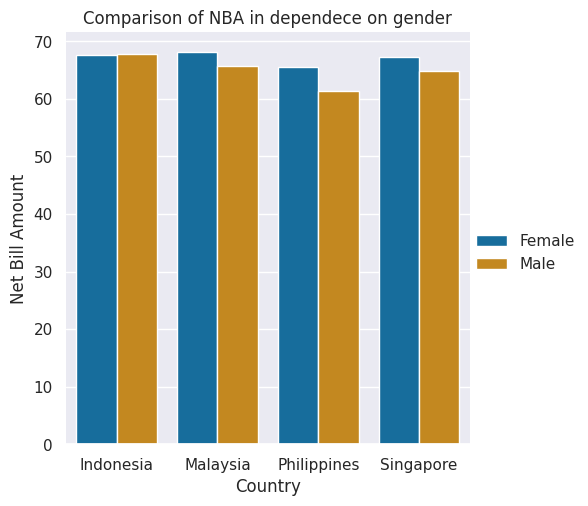

In [302]:
sns.set(style='darkgrid')
gen = sns.catplot(
      data=df, kind='bar',
      x='Country', y='Net Bill Amount', hue='Gender', 
      errorbar=None, palette="colorblind", height=5
)

plt.title('Comparison of NBA in dependece on gender')
gen.despine(left=True)
gen.legend.set_title("")

Бачимо, що тільки у випадку Індонезії середнє значення чистого чеку для чоловіків трошки перевищує це значення для жінок. У інших країнах різниця між чоловіками та жінками помітніша, чоловіки поступаються жінкам, що може вказувати або на те, що середній чек дійсно менший для чоловіків,ніж для жінок, або що через брак даних про чоловіків ми не можемо скласти цілісну картину.

Давайте порахуємо, чи є середні значення чеку для жінок за різними країнами статистично значущо вищі, ніж у чоловіків. 

Приймемо за нульову гіпотезу те, що не має статистично значущої різниці між середніми чеками чоловіків та жінок за різними країнами. Альтернативна ж гіпотеза буде полягати в тому, що середні чеки жінок більші у всіх країнах, ніж у чоловіків.

In [317]:
alpha = 0.05

female_profit = profit_country_gender.loc['Female']
mean_male_profit = profit_country_gender.loc['Male'].mean() #візьмемо середнє для чоловіків за null value

In [318]:
ztest_Score, p_value = ztest(female_profit, value=mean_male_profit, alternative='larger')

In [319]:
if p_value <= alpha:
    print('Fail to accept H0.')
else:
    print('Fail to reject H0.')

Fail to accept H0.


3. Дослідимо кількість товарів, яку замовляють клієнти у нашому наборі даних. Для початку подвимося на те, яка кількість товарів в одному замовленні є найбільш популярною.

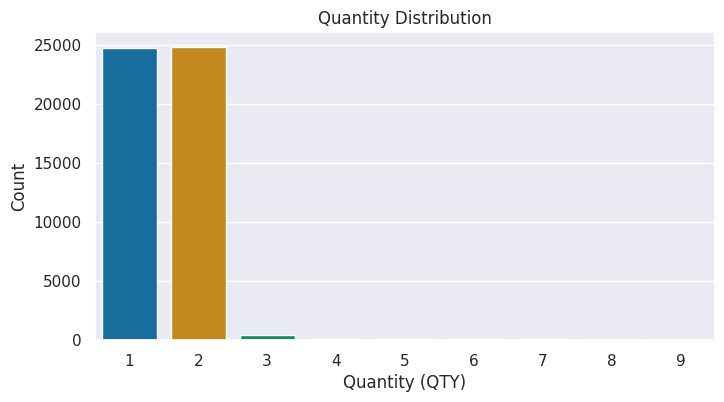

In [267]:
qty_distrib = df.groupby(['QTY'])['QTY'].count().reset_index(name='Count')

sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='QTY', y='Count', data=qty_distrib, palette="colorblind")

plt.xlabel('Quantity (QTY)')
plt.ylabel('Count')
plt.title('Quantity Distribution')

plt.show()


Бачимо, ще безумвними лідерами є кількість покупок в один та два товари. 
Давайте тепер подивимося, яка категорія товарів мала сумарно найбільшу кількість замовленних найменувань.

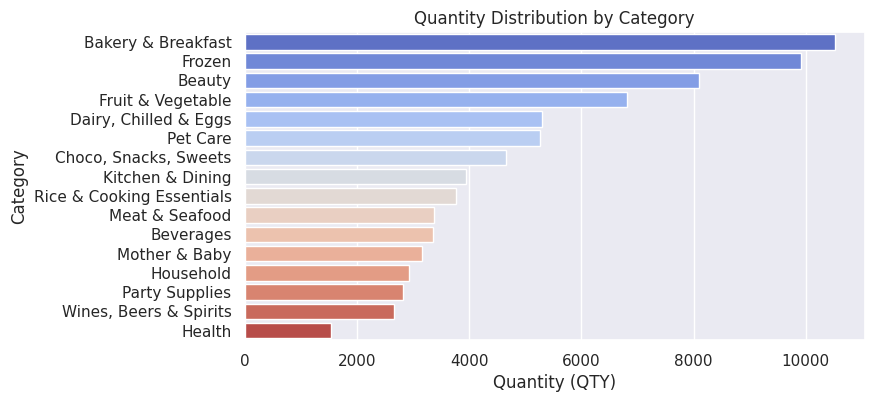

In [320]:
sum_qty_by_category = df.groupby('Category')['QTY'].sum().reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
sns.barplot(x='QTY', y='Category', 
            data=sum_qty_by_category.sort_values('QTY', ascending=False), 
            palette="coolwarm"
)

plt.xlabel('Quantity (QTY)')
plt.ylabel('Category')
plt.title('Quantity Distribution by Category')

plt.show()

Отже, найбільш чисельною категорією є Bakery & Breakfast з невеликим відривом від Frozen, а найменш - Health.
Але чи є найбільш чисельні категорії одночасно і найбільш прибуктовими? Одночасно подивимося зміну показників QTY та Profit Margin відповідно до статі.

In [269]:
category_population_pyramid_qty = df.groupby(['Category', 'Gender'])['QTY'].sum().reset_index()
category_population_pyramid_profit = df.groupby(['Category', 'Gender'])['Profit Margin'].sum().reset_index()

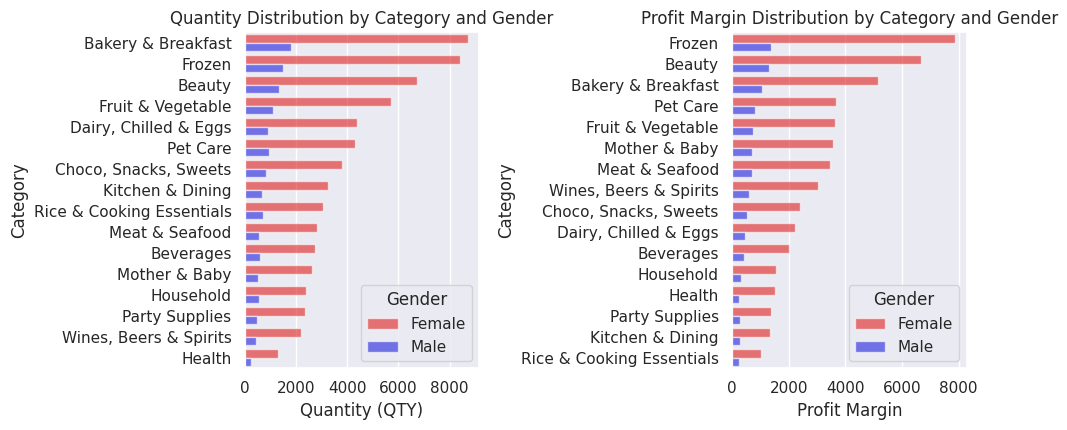

In [395]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
sns.barplot(data=category_population_pyramid_qty.sort_values('QTY', ascending=False),
            x='QTY', y='Category', hue='Gender',
            orient='horizontal', dodge='Faslse', palette={'Male': 'blue', 'Female': 'red'}, alpha=.6
)

plt.xlabel('Quantity (QTY)')
plt.ylabel('Category')
plt.title('Quantity Distribution by Category and Gender');
#тут не вийшло побудувати справжню популяційну піраміду, але дуже хотілося

plt.subplot(2, 2, 2)

sns.barplot(data=category_population_pyramid_profit.sort_values('Profit Margin', ascending=False),
            x='Profit Margin', y='Category', hue='Gender',
            orient='horizontal', dodge='Faslse', palette={'Male': 'blue', 'Female': 'red'}, alpha=.6
)

plt.xlabel('Profit Margin')
plt.ylabel('Category')
plt.title('Profit Margin Distribution by Category and Gender')
plt.tight_layout();

Тепер ми маємо трішки іншу ситуацію. У трійку лідерів за прибутковістю, як і у випадку з кількістю товарів, входять Frozen, Beaty i Bakery & Breakfest, а от найменш прибуткові категорії (особливо Rice & Cooking Essentials i Kitchen & Dining) замовляються достатньо часто (вони знаходяться практично по середині минулого графіку). Лише Party Supplies в обох графіках займає однаково третє знизу місце - як за прибутковістю, так і за кількістю товарів.
Таким чином, треба звернути увагу на Rice & Cooking Essentials i Kitchen & Dining, які є популярними серед клієнтів (було замовлено велику кількість цих товарів), але вони не є прибутковими. 

Пропоную подивитися частоту покупок за цими категоріями за різними роками.

In [271]:
max_profit_category = (
    df
    [df.Category == 'Frozen']
    .groupby('Date')
    .Category
    .count()
) 

min_profit_category = (
    df
    [df.Category == 'Rice & Cooking Essentials']
    .groupby('Date')
    .Category
    .count()
)     

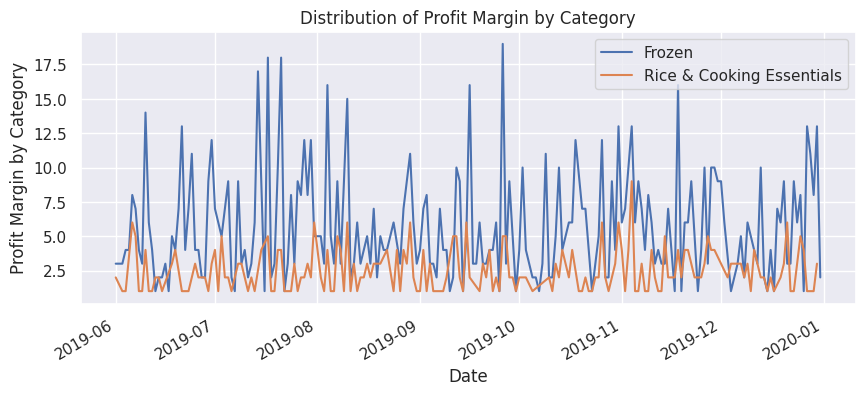

In [272]:
plt.figure(figsize=(10,4))
start_date = pd.to_datetime('2019-06-01')
max_profit_category[max_profit_category.index >= start_date].plot(label='Frozen')
min_profit_category[min_profit_category.index >= start_date].plot(label='Rice & Cooking Essentials')

plt.title('Distribution of Profit Margin by Category')
plt.ylabel('Profit Margin by Category')
plt.legend();

За останні піроку для категорії Rice & Cooking Essentials ми не мали серйозних аномальних змін, лише періодичність, яка може бути пов'язана з місячніми змінами або якимись несезонними факторами. Для порівняння можна подивитися на розподіл за часом для найбільш прибуткової категорії - ми бачимо, що зовнішій вигляд кривих дуже схожий, єдина різниця полягає у тому, що у категорії Frozen досягаються значно вищі значення профіту.

Тому слід звернути на інші аспекти, які можуть впливати на низьку пробутковість цієї категорії, або зібрати більше специфічної інформації для неї.

4. Давайте ще повидимося, яка в нас є залежність між профітом та собівартістю для кожного окремого замовлення. 

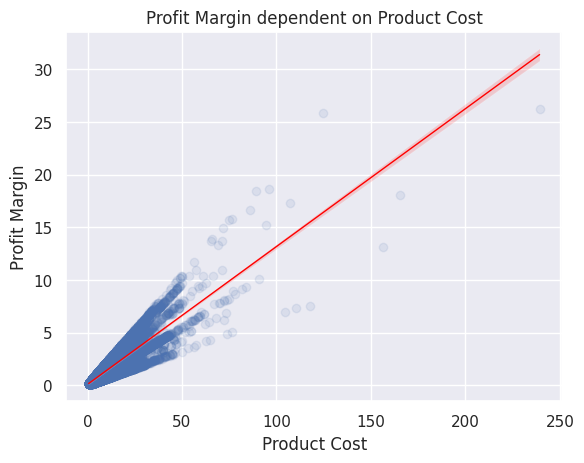

In [277]:
sns.regplot(data=df, x='Product Cost', y='Profit Margin', line_kws={'color':'red', 'linewidth':1}, scatter_kws={'alpha':0.1});
plt.title('Profit Margin dependent on Product Cost');

За графіком можна побачити, що ми маємо сильну позитивну кореляцію між цими параметрами, що означає, що з ростом собівартості (наприклад, коли ми поліпшуємо товар, робимо його більш якісним, що може призвести до зростання витрат на його виготовлення). Окрім того, дані скупчуються сильніше до кореляційної лінії у нижньому лівому кутку, де ми маємо невеликі собівартості та профіти, що свідчить про ще сильнішу кореляцію саме на цій ділянцію З ростом собівартості ми бачимо, що профіт може відхилятися від лінії, хоча і незначно. Тобто прогнозувати його стане трішки складніше, ніж при низьких собівартостях.

Щоб оцінити кореляцію чисельно, можна порахувати коефіцієнт Пірсона. Близкість його значення до 1 свідчить про сильну позитивну кореляцію.

In [276]:
correlation_coefficient, _ = pearsonr(df['Product Cost'],df['Profit Margin'])
print(f"Pearson's Correlation Coefficient: {correlation_coefficient:.3f}")

Pearson's Correlation Coefficient: 0.879


Наш коефіцієнт дійсно достатньо близький до 1, що підтверджує ще раз наше припущення.

5. Подивимося, на частоту використання різних способів оплати у різних банках. Це може допомогти зорієнтувати наших клієнтів, якщо виникнуть складнощі в оплаті або вони будуть надават перевагу певному способу/оплаті у певному банку.

In [386]:
#df.groupby('Payment Mode')['Bank Name'].value_counts().loc['Card'].reset_index(name='Count')

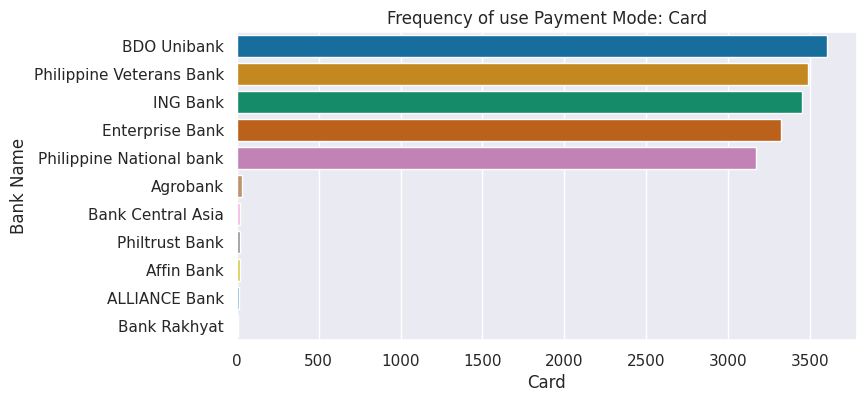

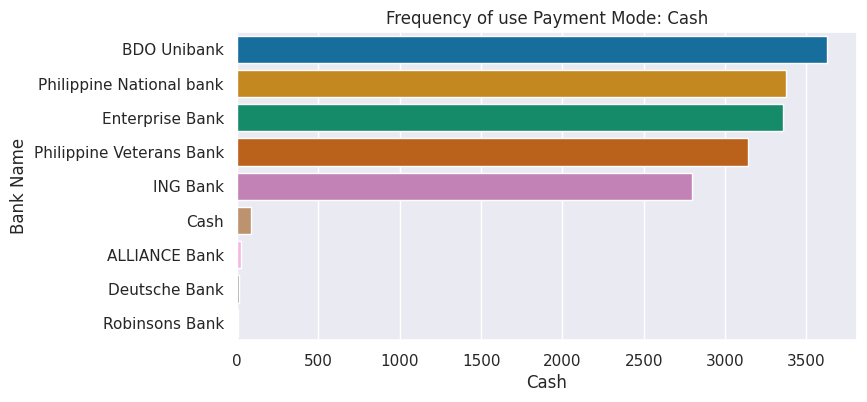

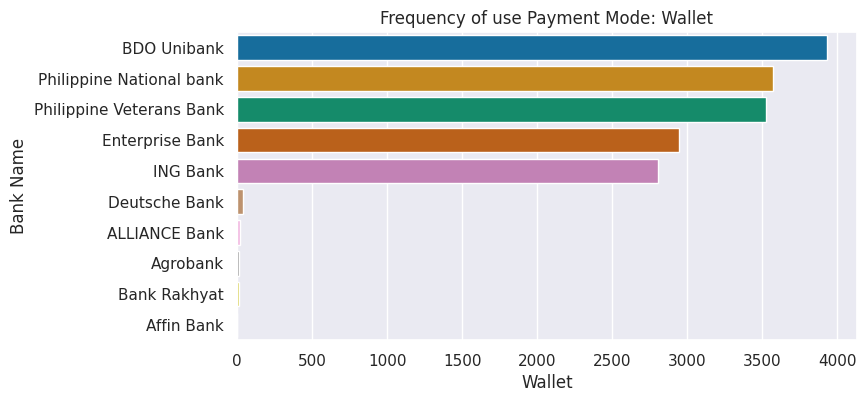

In [385]:
modes = df['Payment Mode'].unique().tolist()

for mode in modes:
    popular_payment_mode = df.groupby('Payment Mode')['Bank Name'].value_counts().loc[mode].reset_index(name='Count')

    sns.set(style="darkgrid")
    plt.figure(figsize=(8, 4))

    sns.barplot(x='Count', y='Bank Name', data=popular_payment_mode, palette="colorblind")

    plt.xlabel(f'{mode}')
    plt.ylabel('Bank Name')
    plt.title(f'Frequency of use Payment Mode: {mode}')

    plt.show()


Серед всього списку банків є кілька, що явно лідують по всім видам оплати. Імовірніше за все, через ці банки було проведено найбільшу кількість покупок.

В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**